# Question1:

## 1a)

Here,I have coded the perceptron algorithm below as described in slide 7 of lecture 15.I is a function called perceptron which takes as input the data(shall be numpy array) and the covergence check value it assumes convergence according to this value if for those many number of iterations the W(weight) does'nt changes then it is assumed to be converged.The function return the Final converged W(weight) for the data.

In [1]:
import numpy as np

In [2]:
def perceptron(data,convergence_check):
    k = convergence_check
    W = np.ones(len(data[0])-1)
    
    while k>0:
        np.random.shuffle(data)
        yn = data[0][len(data[0])-1]
        xn = data[0][:len(data[0])-1]

        if yn*(np.dot(xn,W)) < 0:
            W = np.add(W,yn*xn)
            k = convergence_check
        else:
            k -= 1
    return W

## 1b)

Below function takes data makes it a numpy array and trains the model get the weight vector and returns it.

In [3]:
def Train_model(data,k):
    IW = perceptron(np.array(data),k)
    return IW

The Below function predict(X,W) takes as input a weight vector and a vector of features of data the returns the predicted class for it.</br>
The function Check(data,W) take input some data and a weight vector the try predicting the classes of data and returns the accuracy.

In [4]:
def predict(X,W):
    cls = np.dot(X,W)
    if cls>=0:
        return 1
    else:
        return -1

def Check(data,W):
    Result = np.array(data['col5'])
    Input = np.array(data[['col1','col2','col3','col4']])
    correct = 0
    for i in range(len(Input)):
        if predict(Input[i],W) == Result[i]:
            correct += 1
    return correct/len(Input)

In [5]:
import pandas as pd

In the Below snippet of code I have read the banknote dataset and added column names to it and changed class 0 to class -1 for the perceptron algorithm given in slides to work well.

In [6]:
Bank_data = pd.read_csv("data_banknote_authentication.txt",names = ['col1','col2','col3','col4','col5'])
Bank_data.loc[(Bank_data['col5'] == 0),'col5'] = -1

Here Below I have made the function splitdata(Bank_data,test_ratio) to split the given dataset to 2 sets based on the test_ratio which provide the size of test set.I have made the function in a way that it always try to ensure that representation ratio of both the classes in the data provided is maintained in the test and training set as well.

In [7]:
def splitdata(Bank_data,test_ratio):
    total = len(Bank_data)
    Bank_data_pos = Bank_data[Bank_data['col5']==1]
    Bank_data_neg = Bank_data[Bank_data['col5']==-1]

    shuffled_pos = np.random.permutation(len(Bank_data_pos))
    shuffled_neg = np.random.permutation(len(Bank_data_neg))

    test_size = int(total*test_ratio)
    pos_test_size = int((len(Bank_data_pos)/total)*test_size)
    neg_test_size = test_size-pos_test_size

    test_set_indices = shuffled_neg[:neg_test_size]
    training_set_indices = shuffled_neg[neg_test_size:]

    test_set = Bank_data_neg.iloc[test_set_indices]
    training_set = Bank_data_neg.iloc[training_set_indices]

    test_set_indices = shuffled_pos[:pos_test_size]
    training_set_indices = shuffled_pos[pos_test_size:]


    test_set = test_set.append(Bank_data_pos.iloc[test_set_indices],ignore_index=True)
    training_set = training_set.append(Bank_data_pos.iloc[training_set_indices],ignore_index=True)
    return test_set,training_set

The below is just an trying out example to show how the algorithm is working it has no link with the questions since the test and training derived here are never used just an example is shown here by giving the convergence limit as 100 points.

In [8]:
Testing,Training = splitdata(Bank_data,0.1)
W = Train_model(Training,100)
print("if we train using the above algorithm the Bankdata then we get test set accuracy percentage = "+str(Check(Testing,W)*100))

if we train using the above algorithm the Bankdata then we get test set accuracy percentage = 94.8905109489051


## 1c)

Here,in the below function cross_validation(data,k_values) it takes as input data and some list of k values for which it first breaks the data into validation and training set or we can also term it as test and training set then for each k values it runs the algorithm and finds the Weight vector and notes it accuracy using the check() function.

In [9]:
def cross_validation(data,k_values):
    validation,train = splitdata(data,0.1)
    accuracy = []
    for i in k_values:
        W = Train_model(Training,i)
        accuracy.append(Check(validation,W))
    return accuracy

On below snippet I had divided the complete data to two parts one is Heldout_Validationset and another is training set how using the training set and list of k values from 10 to 100 I have found the error for each k value the printed the best k with minimal error and its converged weight vector.

In [10]:
Heldout_Validationset,Training = splitdata(Bank_data,0.1)
k_val = [i for i in range(10,100,10)]
acc = cross_validation(Training,k_val)
err = [(1-i) for i in acc]
maxIndex = 0
for i in range(len(acc)):
    if acc[i] > acc[maxIndex]:
        maxIndex = i
W = Train_model(Training,k_val[maxIndex])
# Check(Testing,W)
# print(W)
print("Best k = "+str(k_val[maxIndex])+" for which error is least and the best W is = "+str(W)+" and the error percentage is \n"+str((1-acc[maxIndex])*100))

Best k = 70 for which error is least and the best W is = [-30.783153  -19.714159  -21.6347916 -10.2662288] and the error percentage is 
5.691056910569103


I have plotted the error Findings for all k values below.

In [11]:
from matplotlib import pyplot as plt

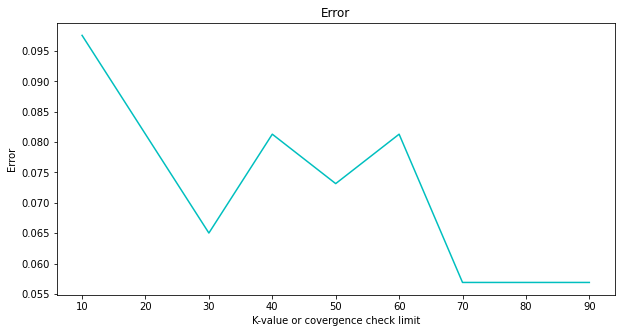

In [12]:
plt.figure(figsize = (10,5))
plt.title("Error")
plt.xlabel("K-value or covergence check limit")
plt.ylabel("Error")
plt.plot(k_val,err,'c')
plt.show()

## 1d)

Below Function is for calculating the F1 score using the W that is generated on above process.Given the data and a Weight vector it return the F1 score for both the classes.

In [13]:
def Calculate_F1score(data,W):
    Result = np.array(data['col5'])
    Input = np.array(data[['col1','col2','col3','col4']])
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(Input)):
        pred = predict(Input[i],W)
        if pred == 1 and Result[i] == 1:
            TP += 1
        elif pred == 1 and Result[i] == -1:
            FP += 1
        elif pred == -1 and Result[i] == 1:
            FN += 1
        else:
            TN += 1
    
    precision_pos = TP/(TP+FP)
    recall_pos = TP/(TP+FN)
    precision_neg = TN/(TN+FN)
    recall_neg = TN/(TN+FP)
    score_pos = (2*precision_pos*recall_pos)/(precision_pos+recall_pos)
    score_neg = (2*precision_neg*recall_neg)/(precision_neg+recall_neg)
    return score_pos,score_neg

On the below code it generated and prints the F1 score of model on the Heldout_Validationset for both the classes.

In [14]:
pos,neg = Calculate_F1score(Heldout_Validationset,W)
print("The F1score for class 1 = "+str(pos)+" and for class 0 is = "+str(neg))

The F1score for class 1 = 0.9380530973451328 and for class 0 is = 0.9565217391304348


# Question2:

## 2a)

The below code generates data from a normal distribution and the function normal() takes input a value,mean and standard deviation and return the pobability density at value.

In [15]:
data = np.random.normal(loc=10, scale=5, size=50)
def normal(val,mean,sd):
    a = 1/(sd*np.sqrt(2*np.pi))
    diff = np.power(val-mean,2)
    b = np.exp(-(diff/(sd*sd*2)))
    return a*b

The below snippet of code generates the mean of the likelihood function by applying mean on the data and generate set of x point values for theta from a linear spaced range of 1 to 50.</br>Then I have calculated the pdf of likelihood for all X-values and stored in prob_likelihood.</br>
Similarly for prior also I have calculated the pdf below.


In [16]:
prob_likelihood = []
mean = np.mean(data)
X = np.linspace(5,50,200)
for i in X:
    prob_likelihood.append(normal(i,mean,5/np.sqrt(50)))
prob_prior = []
for i in X:
    prob_prior.append(normal(i,25,5))

In below snippet I have calculated the pdf of the posterior for the given data on all X-values.

In [17]:
post_sd = np.sqrt((25*25)/(25+(25*50)))
post_mean = post_sd*((25*25+50*mean*25)/(25*25))
prob_post = []
for i in X:
    prob_post.append(normal(i,post_mean,post_sd))

Below is the plot for prior , likelihood and posterior of the data given.

#### Likelihood:
from above likelihood equation,
$$p({y_1,y_2,y_3,..y_N}/{\mu})=\prod_{n=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{\frac{-(y_n-\mu)^2}{2\sigma^2}\right\}$$

$$=\frac{1}{(2\pi)^{N/2}\sigma^N}\exp\left\{(-\frac{N}{2\sigma^2})(\frac{\sum_{n=1}^{N}y_n^2}{N}+\frac{\mu^2 N}{N}-\frac{2\mu \sum_{n=1}^{N}y_n}{N}) \right\}$$

now as $\bar y$ = $\frac{\sum_{n=1}^{N}y_n}{N}$, and $(\bar y)^2$ = $\frac{\sum_{n=1}^{N}y_n^2}{N}$,

$$p({y_1,y_2,y_3,..y_N}/{\mu})\propto \exp \left\{(-\frac{N}{2\sigma^2})((\bar y)^2+\mu^2- 2\mu\bar y) \right\}$$

$$p({y_1,y_2,y_3,..y_N}/{\mu})\propto \exp \left\{ -\frac{N}{2\sigma^2}(\bar y - \mu)^2\right\}$$

$$so,\space \space p({y}/{\mu}) \propto p({\bar y}/{\mu})$$

and as the data is sampled from a normal distribution,
$$\bar y/\mu \sim N(\mu,\frac{\sigma^2}{N})$$
$$so, \space \space p({ \bar y}/{\mu}) \propto\exp \left\{ -\frac{N}{2\sigma^2}(\bar y - \mu)^2\right\}$$

replacing $\frac{\sigma^2}{N}$ by $\sigma_l^2,$

so $p({y}/{\mu})$ be represented by  $$\frac{1}{\sqrt{2\pi\sigma_l^2}}\exp\left\{\frac{-(\bar y-\mu)^2}{2\sigma_l^2}\right\}...derived \space likelihood$$

so we have likelihood distribution as,

$$p({y}/{\mu})=\frac{1}{\sqrt{2\pi\sigma_l^2}}\exp\left\{\frac{-(\bar y-\mu)^2}{2\sigma_l^2}\right\}...derived \space likelihood$$

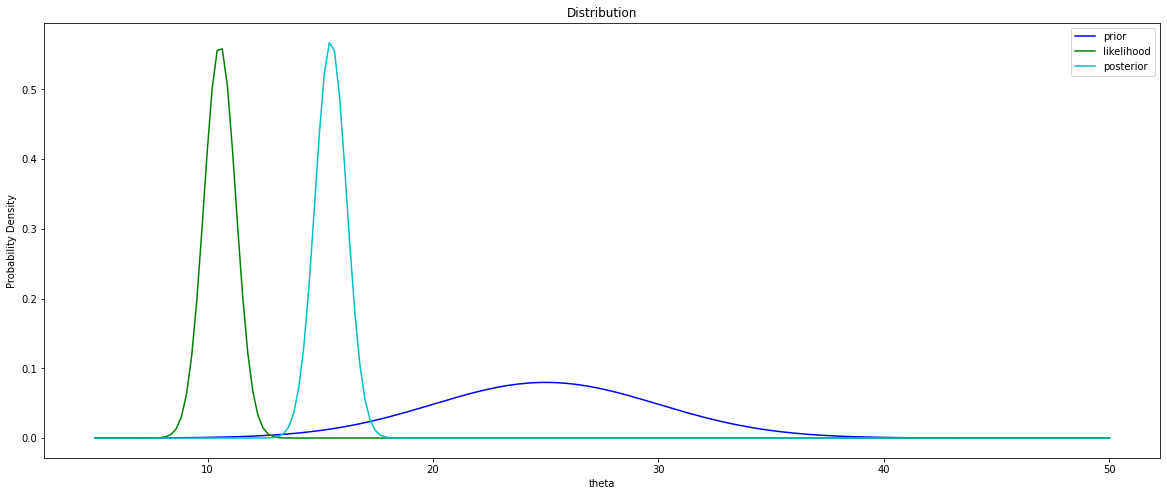

In [18]:

plt.figure(figsize = (20,8))
plt.title("Distribution")
plt.xlabel("theta")
plt.ylabel("Probability Density")
plt.plot(X,prob_prior,'-b',label='prior')
plt.plot(X,prob_likelihood,'g',label='likelihood')
plt.plot(X,prob_post,'c',label='posterior')
plt.legend()
plt.show()

## 2b)

Here below I have made functions for calculation of likelihood,prior and posterior given x, mean and standard deviation. get prior return density at a point and get_likelihood return list of probability densities and Cal_posterior returns the mean and standard deviation of the posterior.These functions will be handy while doing mcmc sampling.

In [19]:
def get_prior(candidate,mean,sd):
    return normal(candidate,mean,sd)
def get_likelihood(X,mean,sd):
    prod = 1
    for i in X:
        prod *= normal(i,mean,sd)
    return prod
def Cal_posterior(m_l,d_l,m_p,d_p,n):
    var = (d_l*d_l*d_p*d_p)/((d_l*d_l)+(d_p*d_p*n))
    mean = var*(((m_p*d_l*d_l)+(n*m_l*d_p*d_p))/(d_l*d_l*d_p*d_p))
    return mean,np.sqrt(var)

Here,in below snippet i have written the MCMC sampling function it takes argument X(data points), N-number of iterations for sampling,sd = width of data(deviation) and returns the sample list that contains all values of theta choosen in all it just remove starting 2000 values since algorithm is not stable at that point.

In [20]:
def MCMC(X,N=200000,sd=5):
    sample = [5]
    
    cur_theta = 5
    
    flag = False
    m_p = 25
    d_p = 5
    
    posterior_cur = get_prior(sample[-1],m_p,d_p)*get_likelihood(X,sample[-1],sd)
    
    for i in range(N):
        
        theta_candidate = np.random.normal(sample[-1],sd)
        prior_val = get_prior(theta_candidate,m_p,d_p)
        likelihood = get_likelihood(X,theta_candidate,sd)
        
        candidate_posterior = likelihood * prior_val
        
        r = candidate_posterior/posterior_cur
        
        if np.random.random() < r:
            sample.append(theta_candidate)
            posterior_cur = candidate_posterior
        else:
            sample.append(sample[-1])
            
        if len(sample) == 2500 and flag == False:
            sample = sample[2000:]
            flag = True
            
    return sample

The below code uses the above snippet to generate the sample histogram and also plots it and also plots the posterior on the same data.

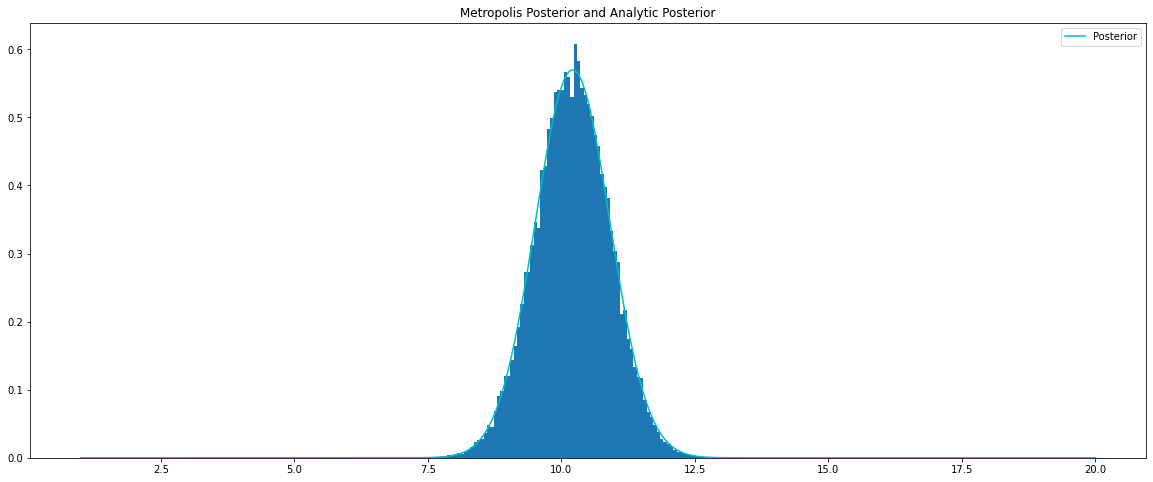

In [21]:

X = np.random.normal(loc=10, scale=5, size=50)
m_l = np.mean(X)
mean_posterior,std_posterior = Cal_posterior(m_l,5,25,5,50)

sample = MCMC(X,200000,5)

x_graph = np.linspace(1,20,500)
plt.figure(figsize = (20,8))
plt.hist(sample,bins = 100,density = True)
post = []
for i in x_graph:
    post.append(normal(i,mean_posterior,std_posterior))
plt.plot(x_graph,post,label= 'Posterior',color = 'c')
plt.legend()
plt.title("Metropolis Posterior and Analytic Posterior")
plt.show()

## 2c)

Trying to sample with less points below.

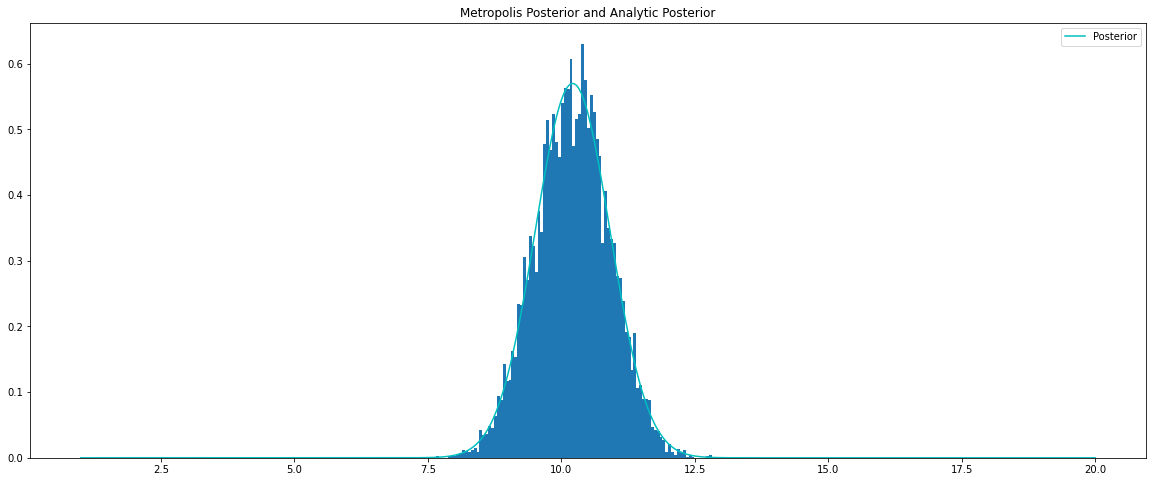

In [22]:
sample = MCMC(X,50000,5)
plt.figure(figsize = (20,8))
plt.hist(sample,bins = 100,density = True)
plt.plot(x_graph,post,label= 'Posterior',color = 'c')
plt.legend()
plt.title("Metropolis Posterior and Analytic Posterior")
plt.show()

Still,the results were almost same as above hence with width = 5 we can say that its optimal.Now lets try with 4 below.

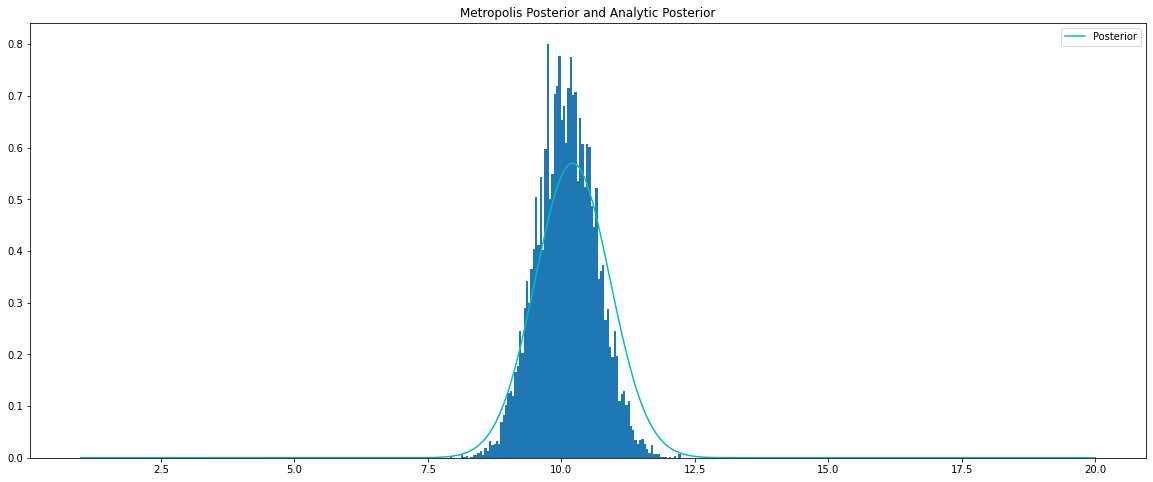

In [23]:
sample = MCMC(X,50000,4)
plt.figure(figsize = (20,8))
plt.hist(sample,bins = 100,density = True)
plt.plot(x_graph,post,label= 'Posterior',color = 'c')
plt.legend()
plt.title("Metropolis Posterior and Analytic Posterior")
plt.show()

The results were ok but not as good as 5.Lets try with 6.

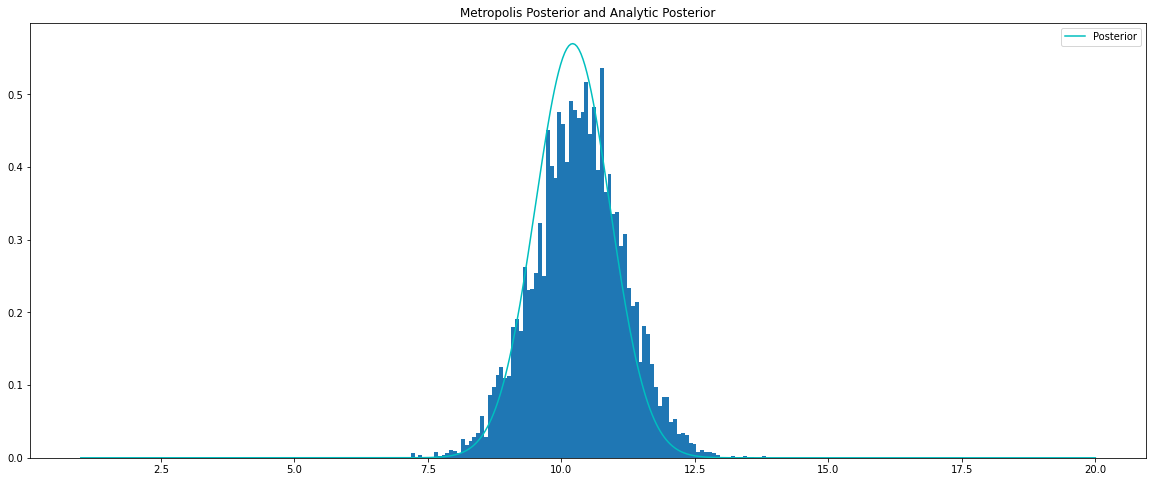

In [24]:
sample = MCMC(X,50000,6)
plt.figure(figsize = (20,8))
plt.hist(sample,bins = 100,density = True)
plt.plot(x_graph,post,label= 'Posterior',color = 'c')
plt.legend()
plt.title("Metropolis Posterior and Analytic Posterior")
plt.show()

Lets try with width = 7 now,

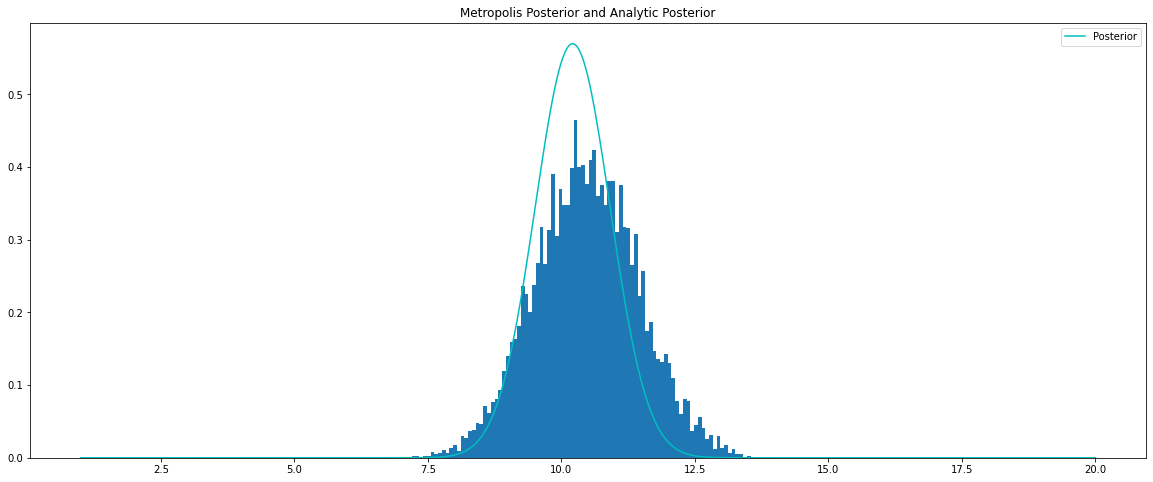

In [25]:
sample = MCMC(X,50000,7)
plt.figure(figsize = (20,8))
plt.hist(sample,bins = 100,density = True)
plt.plot(x_graph,post,label= 'Posterior',color = 'c')
plt.legend()
plt.title("Metropolis Posterior and Analytic Posterior")
plt.show()

The more and more we are deviation from 5 the results are getting worse the we can say 5 is optimal and near to 5 the 4 and 6 are sub-optimal.

### Conclusion:

The speed of convergence depends on the width with optimal width it can converge very fast that with worst width.